<a href="https://colab.research.google.com/github/ZoeyAi555/ThinkCPP/blob/master/lab1_jan11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Lab 1, January 11, 2022**

Lab section 005, Stats 306, Winter 2022

GSI: Heather

Today, we'll take a look at some of the basics of R and practice making some visualizations in R.

**Loading packages**

This may not be such an issue while getting started with Google Colab, but it's worth mentioning. You will have to load tidyverse each time you use it, using the `library` function.

If you're using R on your own computer, you'll also have to install the package the first time you use it. This is done with `install.packages("tidyverse")`.



In [ ]:
library(tidyverse)

**Importing data**

To start, let's import data from a url. 

In [ ]:
co2 <- read_csv("https://raw.githubusercontent.com/heatherjohnston/stat-computing-lab/main/lab01/co2_emissions_tonnes_per_person.csv")
hydro <- read_csv("https://raw.githubusercontent.com/heatherjohnston/stat-computing-lab/main/lab01/hydro_power_generation_per_person.csv")
gdp <- read_csv("https://raw.githubusercontent.com/heatherjohnston/stat-computing-lab/main/lab01/income_per_person_gdppercapita_ppp_inflation_adjusted.csv")

Rows: 194 Columns: 220

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (5): country, 1829, 1830, 1831, 1832
dbl (215): 1799, 1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 119 Columns: 53

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (29): country, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 198...
dbl (24): 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, ...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 195 Columns: 252

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (149): country, 1900, 1902, 1904, 1905, 

**Cleaning the data to get ready for visualization**

Don't worry if this doesn't make sense. We'll cover these methods more later.

In [ ]:
co2 <- co2 %>% mutate(across(!country, as.numeric))
hydro <- hydro %>% mutate(across(!country, as.numeric))
gdp <- gdp %>% mutate(across(!country, as.numeric))

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$e

In [ ]:
co2_long <- co2 %>% pivot_longer(-country, names_to = "year", values_to = "co2")
hydro_long <- hydro %>% pivot_longer(-country, names_to = "year", values_to = "hydro")
gdp_long <- gdp %>% pivot_longer(-country, names_to = "year", values_to = "gdp")

In [ ]:
data <- co2_long %>% left_join(hydro_long, by = c("country", "year")) %>%
  left_join(gdp_long, by = c("country", "year"))

To make this data more manageable, I'm going to select only a few countries. 

In [ ]:
data_all <- data
data <- data_all %>% filter(country %in% c("Ecuador", "Ghana", "Romania"))

**Let's look at the data**

This data comes from [Gapminder](https://www.gapminder.org/data/). 

Each row represents one year in one country (denoted with the variables `year` and `country`).

The variable `co2` represents the metric tons of CO2 emissions per person, in metric tons.

In [ ]:
head(data)

country,year,co2,hydro,gdp
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Ecuador,1799,NA,NA,591
Ecuador,1800,NA,NA,591
Ecuador,1801,NA,NA,591
Ecuador,1802,NA,NA,591
Ecuador,1803,NA,NA,591
Ecuador,1804,NA,NA,591


**Making plots**

Now we will create some plots, starting with a scatter plot.

Warning message:
“Removed 324 rows containing missing values (geom_point).”


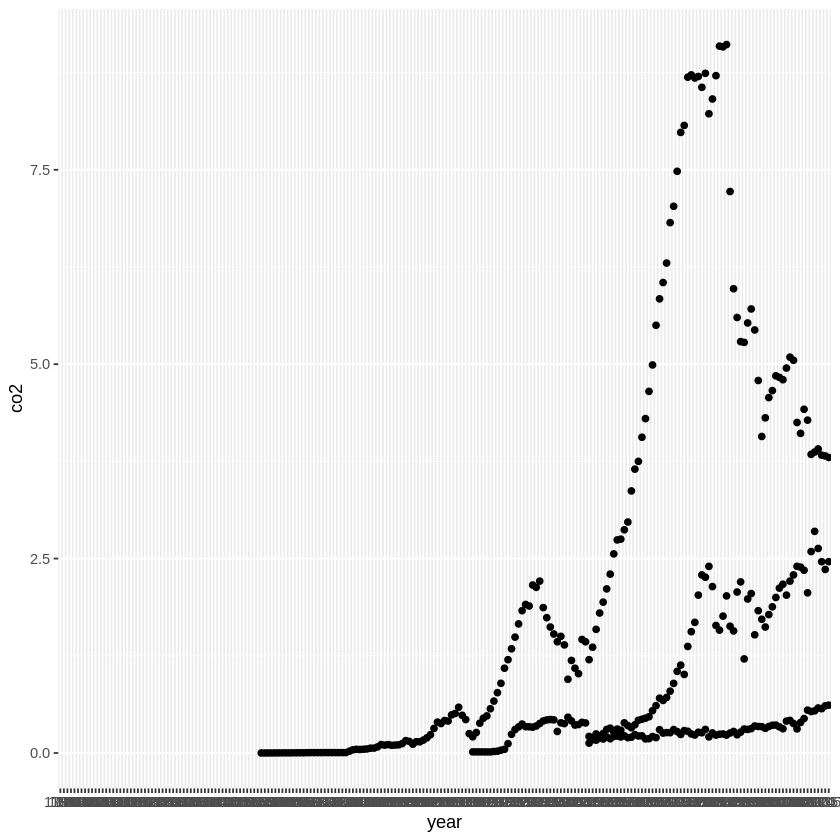

In [ ]:
ggplot(data, aes(x = year, y = co2)) +
  geom_point()

We can make this graph look a little nicer.

Let's start by changing year to be a date so that it doesn't try to print every single year name on the x-axis.

Warning message:
“Removed 324 rows containing missing values (geom_point).”


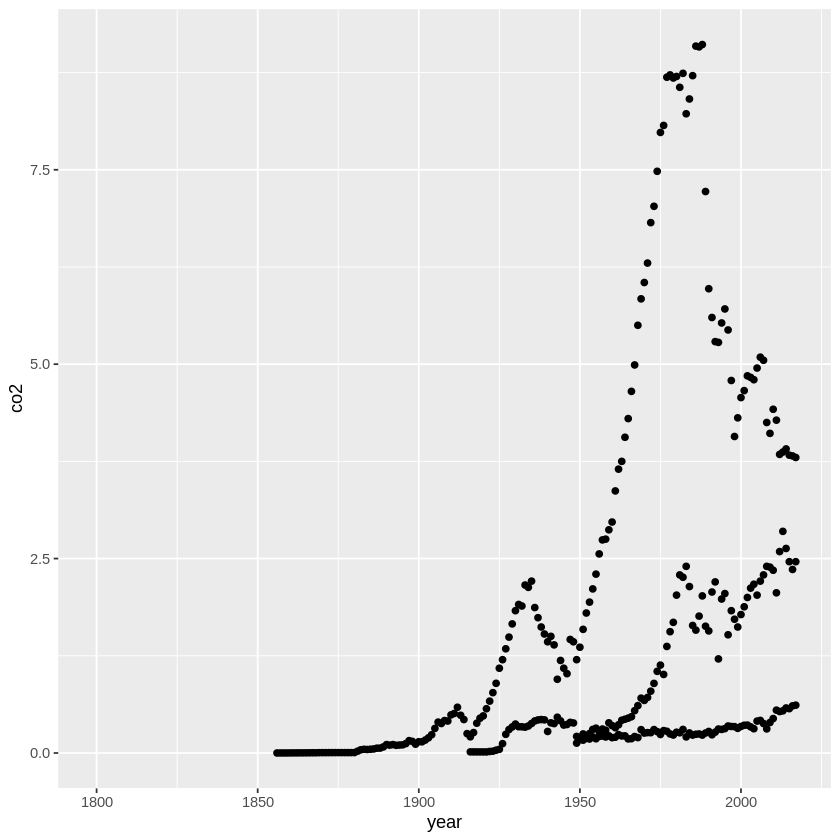

In [ ]:
# First, we'll create a new variable showing each January 1st
data <- data %>% mutate(date = paste(year, "-01-01", sep = ""))

# Next, we'll use the lubridate package to extract the year
data <- data %>% mutate(year = lubridate::year(date))

# Finally, let's remake the plot
ggplot(data, aes(x = year, y = co2)) +
  geom_point()

Now let's add colors to distinguish between the countries. 

Warning message:
“Removed 324 rows containing missing values (geom_point).”


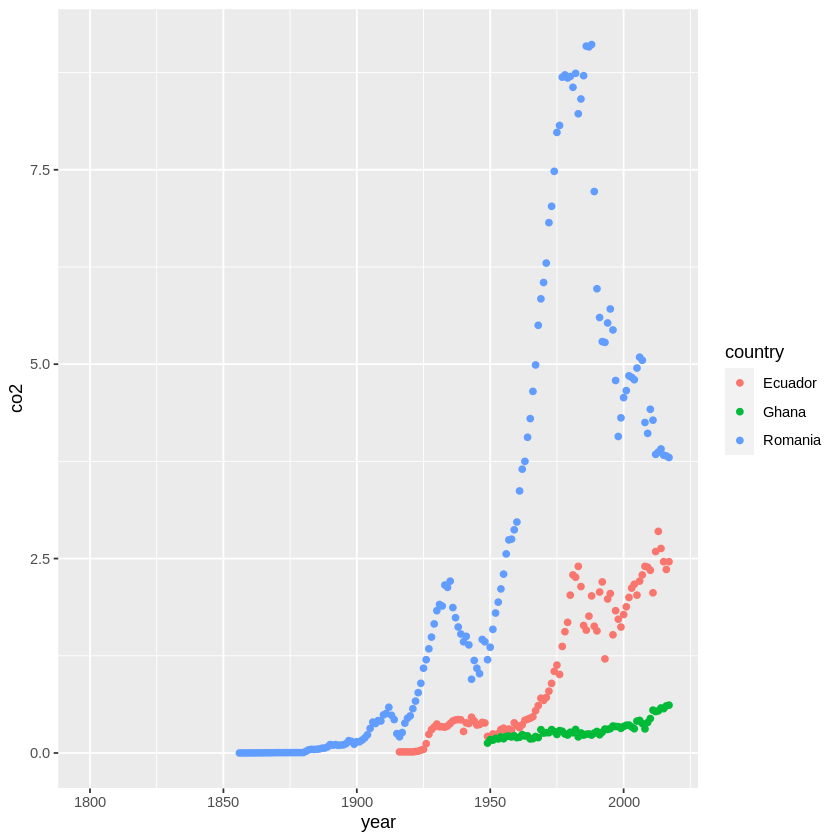

In [ ]:
ggplot(data, aes(x = year, y = co2, color = country)) +
  geom_point()

Let's make the plot look a little nicer by adding some labels.

Warning message:
“Removed 324 rows containing missing values (geom_point).”


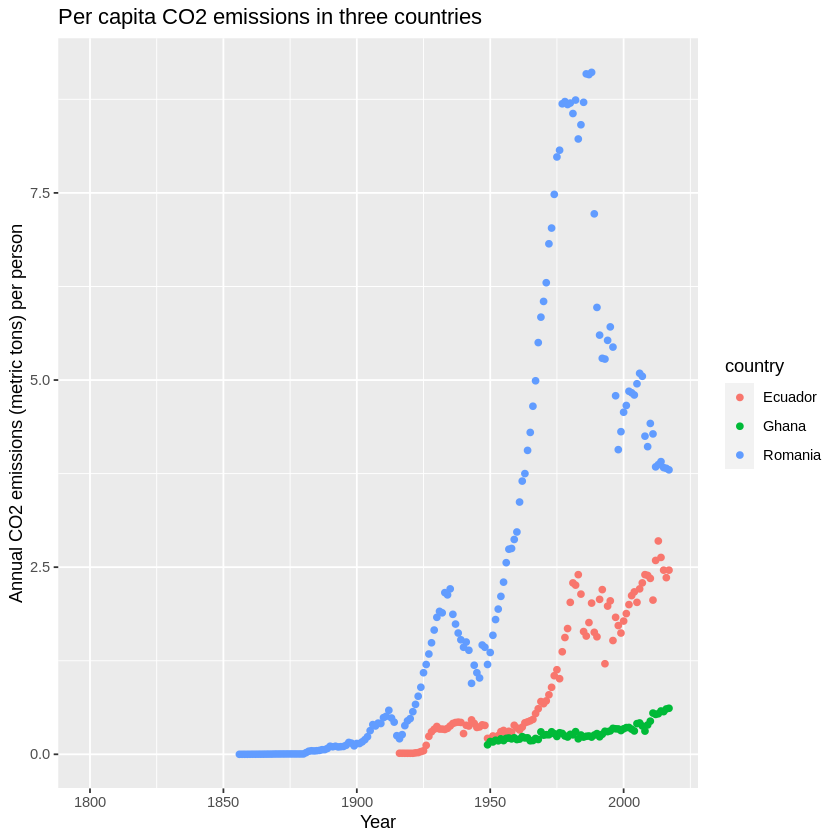

In [ ]:
ggplot(data, aes(x = year, y = co2, color = country)) +
  geom_point() +
  labs(x = "Year",
       y = "Annual CO2 emissions (metric tons) per person",
       title = "Per capita CO2 emissions in three countries")

**Practice time**

The other variables in the data are 

`hydro`: The amount of hydroelectric energy produced per person annually, converted to tons of oil equivalent.

`gdp`: The GDP per capita, in PPP-adjusted 2011 dollars.


Try making a graph of your choosing with these variables.